In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st

1. Пусть Xi ∼ Bern(θ), для H0 : θ = 1/2 и H1 : θ = θ1, где а) θ1 = 1/3, б) θ1 = 2/3. Рассмотрим критерий {sum Xi i=1 to n > C}, n = 10. Построить графики вероятностей ошибки I рода, ошибки II рода и мощности критерия в зависимости от C. Для какой альтернативы осмысленно использовать этот критерий?

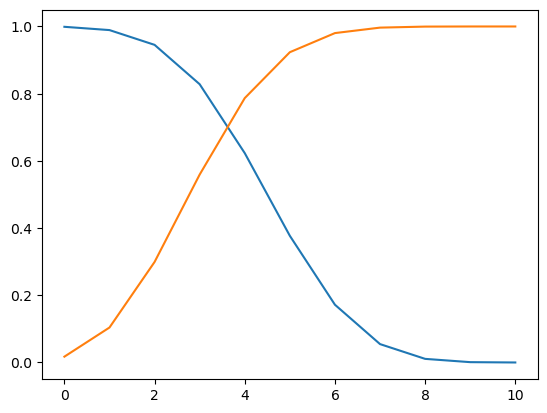

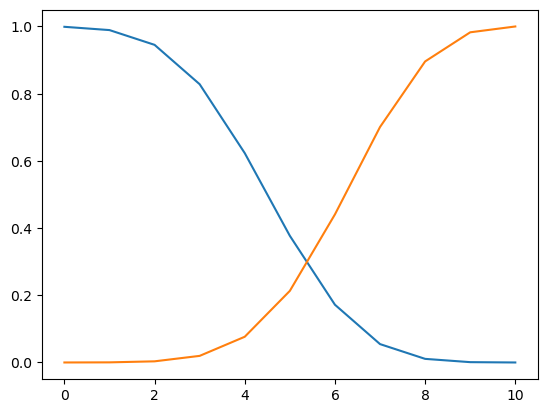

In [6]:
def first(p,c,n):
	result=1
	for i in range(c+1):
		result-=math.factorial(n)/math.factorial(i)/math.factorial(n-i)*p**i*(1-p)**(n-i)
	return result

def second(p,c,n):
	result=0
	for i in range(c+1):
		result+=math.factorial(n)/math.factorial(i)/math.factorial(n-i)*p**i*(1-p)**(n-i)
	return result

theta = float(input())
c = np.arange(11)
plt.plot(c, [first(0.5, c[i], 10) for i in range(11)])
plt.plot(c, [second(1/3, c[i],10) for i in range(11)])
plt.show()
plt.plot(c, [first(0.5, c[i], 10) for i in range(11)])
plt.plot(c, [second(2/3, c[i], 10) for i in range(11)])
plt.show()
#для альтернативы 2/3

2. График ЭФР p-value. Посмотрим как это работает на синтетическом наборе данных: пусть Xi ∼ N (θ, 1), H0 : θ = 0, H1 : θ = θ1. Постройте а) критерий Неймана-Пирсона для θ1 > 0 б) для θ1 < 0 в) асимптотический критерий |MED − 1/2| > C.

In [10]:
def a(X, alpha):
	if np.sum(X)>len(X)**0.5*st.norm.ppf(1-alpha,0,1):
		return ("H1")
	else:
		return ("H0")
def b(X,alpha):
	if np.sum(X)<len(X)**0.5*st.norm.ppf(alpha,0,1):
		return ("H1")
	else:
		return ("H0")
def c(X,alpha):
	const=1/len(X)**0.5*st.norm.ppf(1-alpha/2,0,(math.pi/2)**0.5)
	if abs(np.median(X))>abs(const):
		return ("H1")
	else:
		return ("H0")

Рассчитайте для них ф.р. статистик критерия, найдите p-value критериев.

In [9]:
def pvala(X):
	return (1-st.norm.cdf(np.sum(X)/len(X)**0.5,0,1))
def pvalb(X):
	return st.norm.cdf(np.sum(X)/len(X)**0.5,0,1)
def pvalc(X):
	return (1-st.norm.cdf(len(X)**0.5*abs(np.median(X)),0,(math.pi/2)**0.5)+st.norm.cdf(-len(X)**0.5*abs(np.median(X)),0,(math.pi/2)**0.5))

(a) Построить графики p-value всех трех критериев, выбирая данные а) при верной нулевой гипотезе б) при каждой из альтернатив (θ1 = −1 и θ1 = 1). Построить их на одном графике. В какую сторону отклоняются графики от прямой y = x? (b) Как влияет размер выборки на отклонение от y = x? (c) Какой критерий самый лучший?

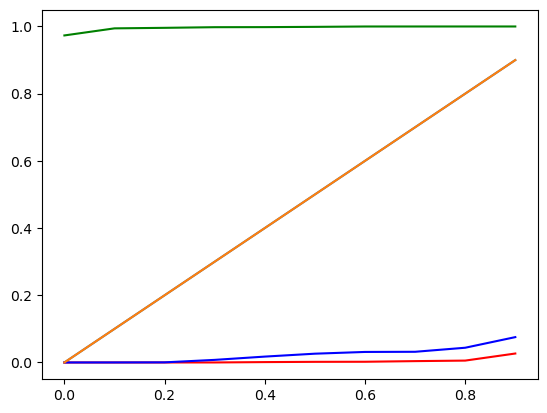

In [13]:
theta=float(input())
k=int(input())
odin=np.zeros(k)
dva=np.zeros(k)
tri=np.zeros(k)
for i in range(k):
	X=np.random.normal(size=k,loc=theta,scale=1)
	odin[i]=pvala(X)
	dva[i]=pvalb(X)
	tri[i]=pvalc(X)
odin=np.sort(odin)
dva=np.sort(dva)
tri=np.sort(tri)
plt.plot(np.arange(k)/k,[i/k for i in range(k)])
plt.plot(np.arange(k)/k,odin,color='red')
plt.plot(np.arange(k)/k,dva,color='green')
plt.plot(np.arange(k)/k,tri,color='blue')
plt.plot(np.arange(k)/k,np.arange(k)/k)
plt.show()
	

3. X1, . . . , Xn ∼ Bern(θ), H0 : θ = 1/2, H1 : θ = 1/3. При каких n можно построить критическое множество вида {sum Xi < C} так, чтобы вероятности ошибок первого и второго рода не превышали 0.05? Построить графики вероятностей ошибок первого и второго рода (как функции от C) для разных n.

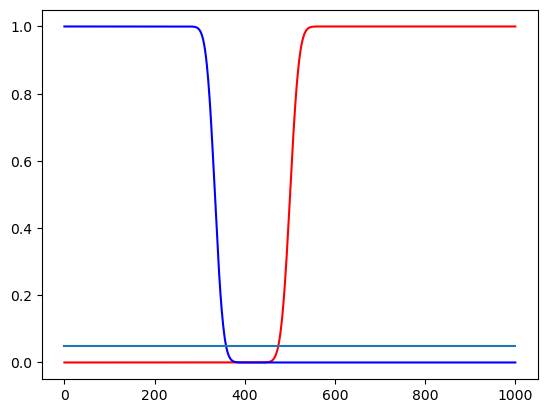

In [76]:
def first(c,n):
	result=0
	for i in range(c):
		result+=math.comb(n,i)
	return (result/2**n)
def second(c,n):
	result=0
	for i in range(c,n+1):
		result+=math.comb(n,i)*2**(n-i)
	return (result/3**n)
n=int(input())
plt.plot(range(n+1),[first(i,n) for i in range(n+1)],color='red')
plt.plot(range(n+1),[second(i,n) for i in range(n+1)],color='blue')
plt.plot(range(n+1),[0.05 for i in range(n+1)])